In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

In [4]:
datapath = os.path.join("datasets", "titanic", "")

In [6]:
df = pd.read_csv(datapath + "train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Age'].isnull().sum()

177

C:\Users\kavya\miniconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

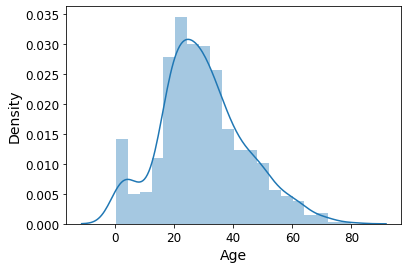

In [10]:
sns.distplot(df['Age'].dropna())

C:\Users\kavya\miniconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

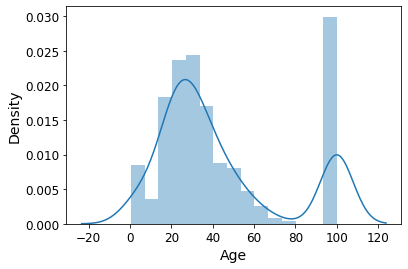

In [11]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passenger')

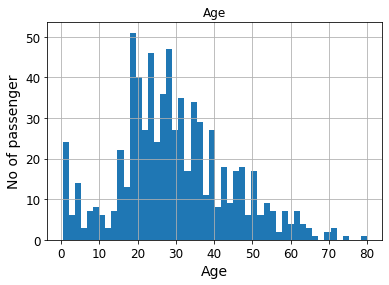

In [12]:
### Guassian distribution - we use 3rd standard deviation
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

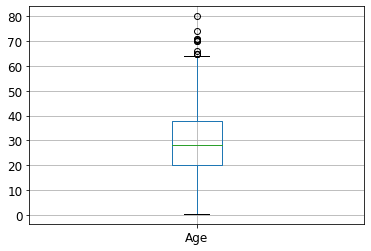

In [13]:
figure = df.boxplot(column="Age")

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
#### Assuming age follows the Gaussian distribution, we will calculate the boundaries which differenciates the outliers
df['Age'].mean()

29.69911764705882

In [18]:
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()

In [19]:
upper_boundary

73.27860964406094

In [20]:
lower_boundary

-13.880374349943303

In [21]:
#### compute interquartile range to calculate boundaries

IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [23]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)

In [24]:
lower_bridge

-6.6875

In [25]:
upper_bridge

64.8125

In [26]:
### Extreme outliers
lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)

In [27]:
lower_bridge

-33.5

In [28]:
upper_bridge

91.625

In [29]:
##### Feature is skewed

Text(0, 0.5, 'No of passenger')

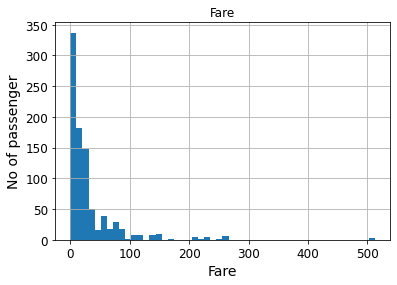

In [31]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

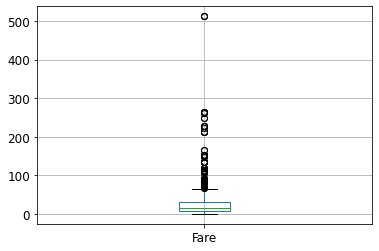

In [33]:
figure = df.boxplot(column='Fare')

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [35]:
#### compute interquartile range to calculate boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [39]:
lower_bridge1 = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge1 = df['Fare'].quantile(0.75) + (IQR*1.5)

In [40]:
lower_bridge1


-26.724

In [41]:
upper_bridge1

65.6344

In [42]:
lower_bridge1 = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge1 = df['Fare'].quantile(0.75) + (IQR*3)

In [43]:
lower_bridge1

-61.358399999999996

In [44]:
upper_bridge1

100.2688

In [46]:
data = df.copy()

In [47]:
data.loc[data['Age']>=73, 'Age'] = 73

In [49]:
data.loc[data['Fare']>=100, 'Fare'] = 100

In [50]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0, 0.5, 'No of passenger')

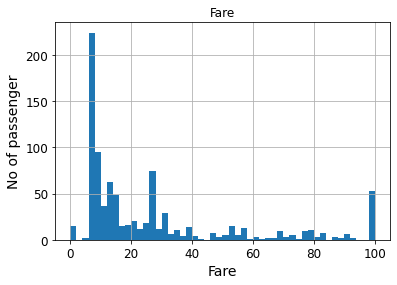

In [52]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [53]:
X = data[['Age', 'Fare']].fillna(0)
y = data['Survived']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)

In [55]:
#### Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = LR_model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test, y_pred)

0.6940298507462687